In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
#Data and basic statistics

nb_accuracy = np.array([0.6409, 0.7017, 0.7212, 0.6913, 0.6333, 0.6415, 0.6216, 0.5214, 0.6578, 0.7865])
dt_accuracy = np.array([0.7524, 0.8694, 0.8803, 0.9102, 0.7758, 0.8054, 0.6224, 0.7685, 0.9938, 0.7524])
nn_accuracy = np.array([0.7164, 0.5883, 0.8481, 0.6825, 0.7699, 0.8479, 0.7012, 0.4959, 0.9259, 0.7455])

nb_error = 1 - nb_accuracy
dt_error = 1 - dt_accuracy
nn_error = 1 - nn_accuracy

nb_mean = np.mean(nn_error)
dt_mean = np.mean(dt_error) 
nn_mean = np.mean(dt_error)

nb_std = np.std(nb_error)
dt_std = np.std(nb_error)
nn_std = np.std(nb_error)

print("\n nb_error:")
print(nb_error)
print("Mean:" + str(nb_mean))
print("Stdv:" + str(nb_std))
print("\n dt_error:")
print(dt_error)
print("Mean:" + str(dt_mean))
print("Stdv:" + str(dt_std))
print("\n nn_error:") 
print(nn_error)
print("Mean:" + str(nn_mean))
print("Stdv:" + str(nn_std))




 nb_error:
[0.3591 0.2983 0.2788 0.3087 0.3667 0.3585 0.3784 0.4786 0.3422 0.2135]
Mean:0.26783999999999997
Stdv:0.0667427868761861

 dt_error:
[0.2476 0.1306 0.1197 0.0898 0.2242 0.1946 0.3776 0.2315 0.0062 0.2476]
Mean:0.18694000000000002
Stdv:0.0667427868761861

 nn_error:
[0.2836 0.4117 0.1519 0.3175 0.2301 0.1521 0.2988 0.5041 0.0741 0.2545]
Mean:0.18694000000000002
Stdv:0.0667427868761861


In [22]:
cf1_error = np.array([0.1,0.2,0.3,0.1,0.2,0.2,0.2,0.3,0.1,0.2])
cf2_error = np.array([0.3,0.1,0.2,0.1,0.1,0.2,0.3,0.2,0.2,0.2])
cf3_error = np.array([0.2,0.3,0.3,0.1,0.3,0.1,0.1,0.1,0,0.1])
#calculate sample means
cf1_mean = np.mean(cf1_error)
cf2_mean = np.mean(cf2_error)
cf3_mean = np.mean(cf3_error)
#calculate the mean of sample means for each model
means = np.array([cf1_mean, cf2_mean, cf3_mean])
m = np.mean(means)
# calculate the SSb = K.sum((means- m)^2)
SSb = (10 * np.sum((means - m)**2))
print("SSb")
print(SSb)
# calculate SSw 
cf1_var = np.sum((cf1_error - cf1_mean)**2)
cf2_var = np.sum((cf2_error - cf2_mean)**2)
cf3_var = np.sum((cf2_error - cf2_mean)**2)
SSw = np.sum([cf1_var, cf2_var, cf3_var])
print("SSw")
print(SSw)


SSb
0.005999999999999999
SSw
0.14699999999999996


In [23]:
data = np.array([1,2,3,1,2,2,2,3,1,2])
#MLE for mean and variance
mean = np.mean(data)

S = np.sum((data- mean)**2)/10
print(S)

0.48999999999999994


[0.49903984 6.95550562]
[[-0.76451416 -0.64460693]
 [ 0.64460693 -0.76451416]]
(12,)
[-5.69643799]


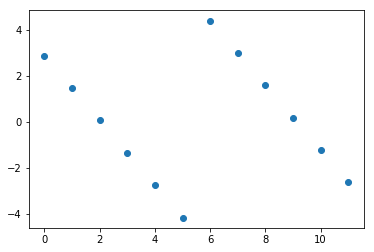

In [43]:
data = np.array([[1,0],[2,1],[3,2],[4,3],[5,4],[6,5],[1,-2],[2,-1],[3,0],[4,1],[5,2],[6,3]])
data = data - np.mean(data)
cov = np.cov(data, rowvar = False)
eigval, eigvec = np.linalg.eig(cov)
print(eigval)
print(eigvec)
Z = data @ eigvec[:,1]
print(Z.shape)
plt.scatter(range(12),Z)
plt.show
x= np.array([[3.5,4.5]])
z1= x @ eigvec[:,1]
print(z1)

In [18]:
#ANOVA 
#H0: nb_mean = dt_mean = nn_mean 
#calculate the mean of sample means for each model 
means = np.array([nb_mean, dt_mean, nn_mean])
m = np.mean(means)
# calculate the SSb = K.sum((means- m)^2)
SSb = 10 * np.sum((means - m)**2)
print("SSb:" + str(SSb))
# calculate SSw 
nb_var = np.sum((nb_error - nb_mean)**2)
dt_var = np.sum((dt_error - dt_mean)**2)
nn_var = np.sum((nn_error - nn_mean)**2)
SSw = np.sum([nb_var, dt_var, nn_var])
print("SSw:" + str(SSw))
#calculate the statistic stat = (SSb/(L-1))/(SSw/l(K-1)) , K = 10, L = 3
Astat = (SSb/2)/(SSw/18)
print("Astat:" + str(Astat))

#from F-table F(0.5,2,18) = 3.5546
#From above calculation we get Astat = 0.9750
# Since Astat > F(0.5,2,18) , Hence we reject the H0


SSb:0.04363206666666661
SSw:0.40271643999999995
Astat:0.9750995017735048


In [19]:
# Paired t-test to determine if NB and DecTree have equal errors
#alpha/2 = 0.025
#H0: nb_dt_mean = 0
nb_dt = nb_error - dt_error 
print("Difference of the error rate per fold:")
print(nb_dt)
nb_dt_mean = np.mean(nb_dt)
nb_dt_std = np.std(nb_dt)
nb_dt_stat = (np.sqrt(10) * (nb_dt_mean)) /nb_dt_std
print("t_stat:" + str(nb_dt_stat))

# From t-table, t(apha/2,K-1)
# t(0.025,9) = 2.262
# To accept H0, t_stat has to be between (-2.262, 2.262)
# t_stat = 4.6258
# since t_stat is not in the expected range, we reject H0 



Difference of the error rate per fold:
[ 0.1115  0.1677  0.1591  0.2189  0.1425  0.1639  0.0008  0.2471  0.336
 -0.0341]
t_stat:4.625843940334485


In [20]:
# Paired t-test to determine if DecTree and Knearest Neighbor have equal errors
#alpha/2 = 0.025
#H0: dt_nn_mean = 0
dt_nn = dt_error - nn_error 
print("Difference of the error rate per fold:")
print(dt_nn)
dt_nn_mean = np.mean(dt_nn)
dt_nn_std = np.std(dt_nn)
dt_nn_stat = (np.sqrt(10) * (dt_nn_mean)) /dt_nn_std
print("t_stat:" + str(dt_nn_stat))

# From t-table, t(apha/2,K-1)
# t(0.025,9) = 2.262
# To accept H0, t_stat has to be between (-2.262, 2.262)
# t_stat = -2.056
# since t_stat is within the expected range, we accept H0 


Difference of the error rate per fold:
[-0.036  -0.2811 -0.0322 -0.2277 -0.0059  0.0425  0.0788 -0.2726 -0.0679
 -0.0069]
t_stat:-2.056398160997468


In [21]:
#Hypothesis Testing
#p0 = 0.3
#H0: mu < 0.3
#calculate the t_stat for the models using the formula sqrt(K)*(m - p0)/S
p0 = 0.3 
nb_stat = (np.sqrt(10) * (nb_mean - p0 ))/nb_std
dt_stat = (np.sqrt(10) * (dt_mean - p0 ))/dt_std
nn_stat = (np.sqrt(10) * (nn_mean - p0 ))/nn_std

print("nb_stat:" + str(nb_stat))
print("dt_stat:" + str(dt_stat))
print("nn_stat:" + str(nn_stat))


###from t-table, t(alpha,K-1), Here DF= K-1 = 9

##for alpha 0.10,and DF =9,  tc= 1.383

# for NB: nb_stat = -1.523 < tc , Hence we accept the null hypothesis
#for DT: nb_stat = -5.356 < tc , Hence we accept the null hypothesis
#for KNN: nb_stat = -5.356 < tc , Hence we accept the null hypothesis


##for alpha 0.05,and DF =9,  tc=1.833

# for NB: nb_stat = -1.523 < tc , Hence we accept the null hypothesis
#for DT: nb_stat = -5.356 < tc , Hence we accept the null hypothesis
#for KNN: nb_stat = -5.356 < tc , Hence we accept the null hypothesis


#for alpha 0.025,and DF =9,  tc=2.262 

# for NB: nb_stat = -1.523 < tc , Hence we accept the null hypothesis
#for DT: nb_stat = -5.356 < tc , Hence we accept the null hypothesis
#for KNN: nb_stat = -5.356 < tc , Hence we accept the null hypothesis



nb_stat:-1.523742928800317
dt_stat:-5.356790283898124
nn_stat:-5.356790283898124
